<a href="https://www.kaggle.com/code/bhavinmoriya/python-for-finance-statistics?scriptVersionId=116219561" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

We shall discuss the chapter on Statistics from : https://www.amazon.com.br/Python-Finance-2e-Yves-Hilpisch/dp/1492024333

PS : Drift = Mean and Standard deviation = volatility = risk

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import numpy.random as npr
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_datareader as web
# import matplotlib.pyplot as plt
import seaborn as sns
import math

import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

from datetime import datetime as dt, timedelta as td
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
def gen_paths(S0, r, sigma, T, M, I):
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +\
                                         sigma * math.sqrt(dt) * rand)
    return paths

In [3]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
np.random.seed(1000)

paths = gen_paths(S0, r, sigma, T, M, I)

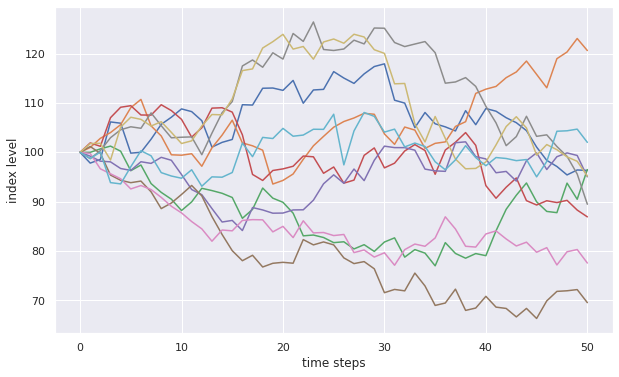

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level');

In [5]:
log_returns = np.log(paths[1:]/paths[:-1])

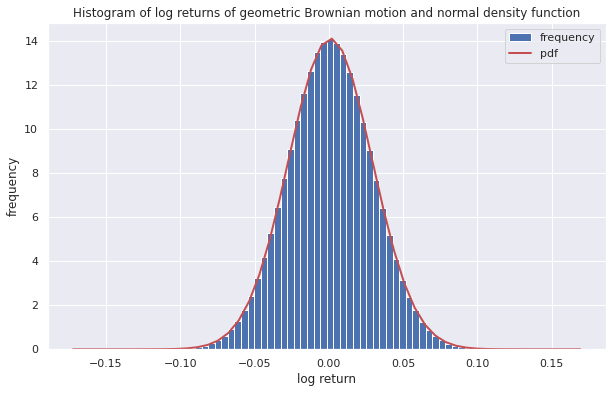

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True,\
label='frequency', color='b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),'r', lw=2.0, label='pdf')
plt.legend()
plt.title('Histogram of log returns of geometric Brownian motion and normal density function');

So we can see that log_returns are normally distributed. But this can be verified using QQ plot.

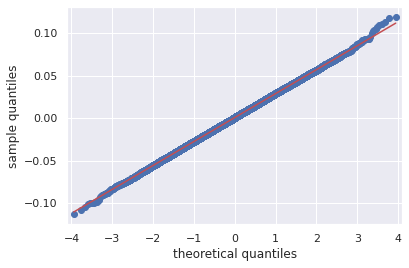

In [7]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

However appealing the graphical approaches might be, they generally cannot replace
more rigorous testing procedures. The function normality_tests() used in the next
example combines three different statistical tests:

Skewness test ( skewtest() )

This tests whether the skew of the sample data is “normal” (i.e., has a value close
enough to zero).

Kurtosis test ( kurtosistest() )

Similarly, this tests whether the kurtosis of the sample data is “normal” (again,
close enough to zero).

Normality test ( normaltest() )

This combines the other two test approaches to test for normality.
The test values indicate that the log returns of the geometric Brownian motion are
indeed normally distributed—i.e., they show p-values of 0.05 or above:



In [8]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on'''

    print(f'Skew of data set {scs.skew(arr)}')

    print(f'Skew test p-value {scs.skewtest(arr)[1]}')

    print(f'Kurt of data set {scs.kurtosis(arr)}')
    print(f'Kurt test p-value {scs.kurtosistest(arr)[1]}')
    print(f'Norm test p-value {scs.normaltest(arr)[1]}')
normality_tests(log_returns.flatten())

Skew of data set 0.0005468217956237663
Skew test p-value 0.42995439684794856
Kurt of data set 0.0008466944573917168
Kurt test p-value 0.5406500566703105
Norm test p-value 0.607355212118118


All p-values are well above 0.05.
Finally, a check whether the end-of-period values are indeed log-normally distributed. This boils down to a normality test, since one only has to transform the data
by applying the log function to it to then arrive at normally distributed values (or
maybe not).

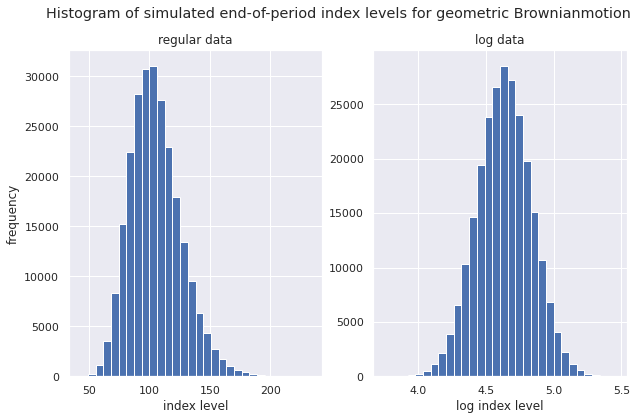

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(paths[-1], bins=30)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.set_xlabel('log index level')
ax2.set_title('log data')
plt.suptitle('Histogram of simulated end-of-period index levels for geometric Brownian\
motion');

In [10]:
def print_statistics(array):
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

In [11]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [12]:
normality_tests(np.log(paths[-1]))

Skew of data set -0.0009216127048951703
Skew test p-value 0.8507755212153305
Kurt of data set -0.003270068224388911
Kurt test p-value 0.7436960601583089
Norm test p-value 0.931323504333198


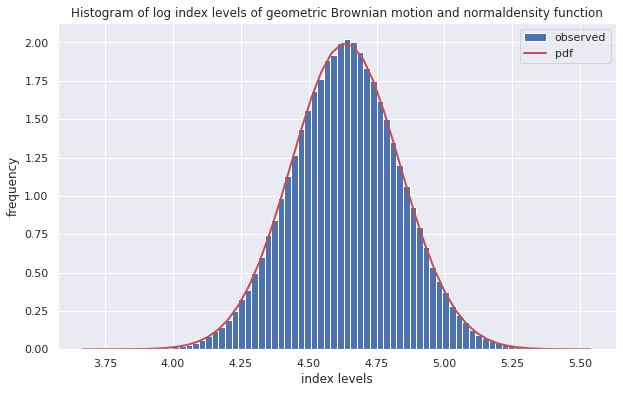

In [13]:
plt.figure(figsize=(10, 6))
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, density=True,
label='observed', color='b')
plt.xlabel('index levels')
plt.ylabel('frequency')
# print(plt.axis()[0], plt.axis()[1])
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
'r', lw=2.0, label='pdf')
plt.legend()
plt.title('Histogram of log index levels of geometric Brownian motion and normal\
density function');

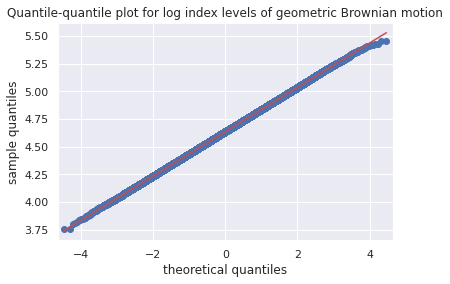

In [14]:
sm.qqplot(log_data, line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('Quantile-quantile plot for log index levels of geometric Brownian motion');

# Real-World Data
This section analyzes four historical financial time series, two for technology stocks
and two for exchange traded funds (ETFs)

In [15]:
symbols = ['SPY', 'GLD', 'AAPL', 'MSFT']

In [16]:
data = web.get_data_stooq(symbols, start='2010-01-01', end='2018-12-31')['Close']
data

Symbols,SPY,GLD,AAPL,MSFT
Date,,,,
2010-01-04,90.5872,109.80,6.51522,24.3178
2010-01-05,90.8273,109.70,6.52639,24.3267
2010-01-06,90.8759,111.51,6.42221,24.1758
2010-01-07,91.2784,110.82,6.41085,23.9257
2010-01-08,91.5818,111.37,6.45401,24.0934
...,...,...,...,...
2018-12-24,220.2260,120.02,35.43090,90.1768
2018-12-26,231.3520,119.66,37.92330,96.3359
2018-12-27,233.1370,120.57,37.67610,96.9356


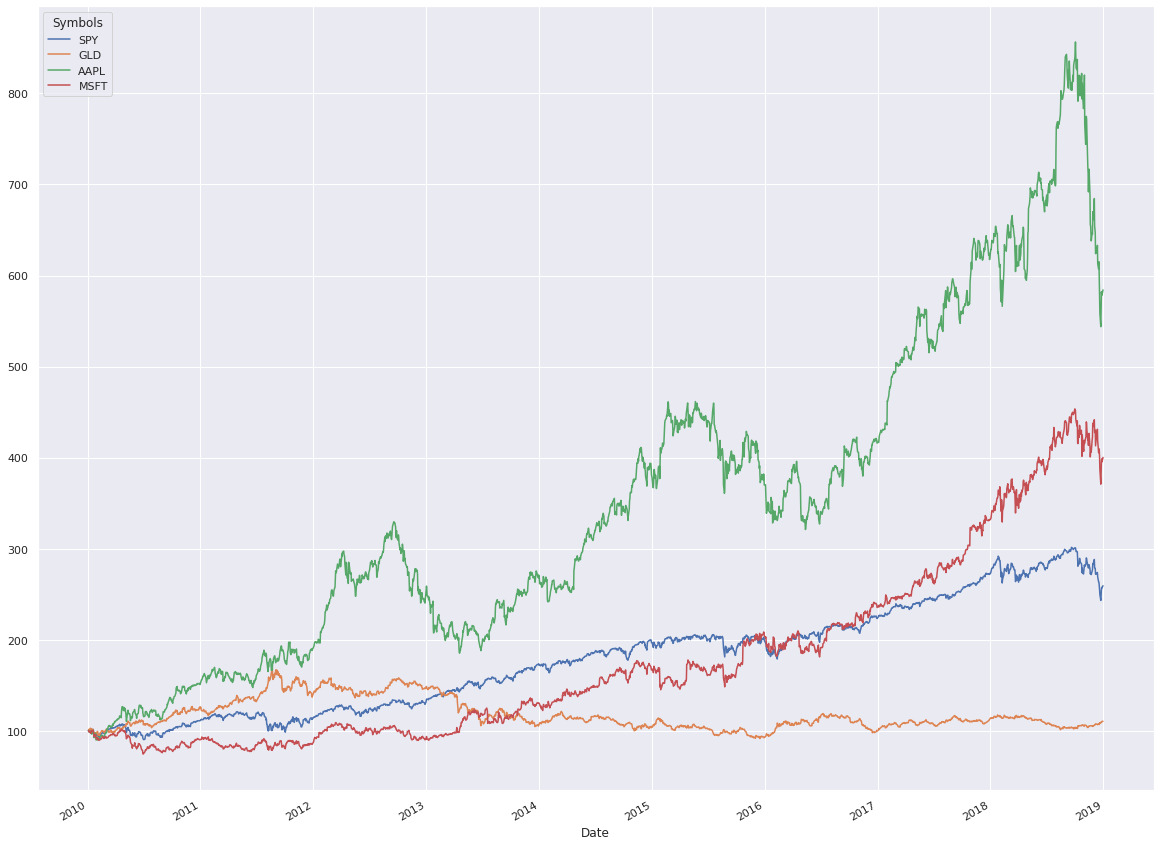

In [17]:
(data / data.iloc[0] * 100).plot(figsize=(20, 16));

In [18]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

Symbols,SPY,GLD,AAPL,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002647,-0.000911,0.001713,0.000366
2010-01-06,0.000535,0.016365,-0.016092,-0.006222
2010-01-07,0.004419,-0.006207,-0.001770,-0.010399
2010-01-08,0.003318,0.004951,0.006710,0.006985


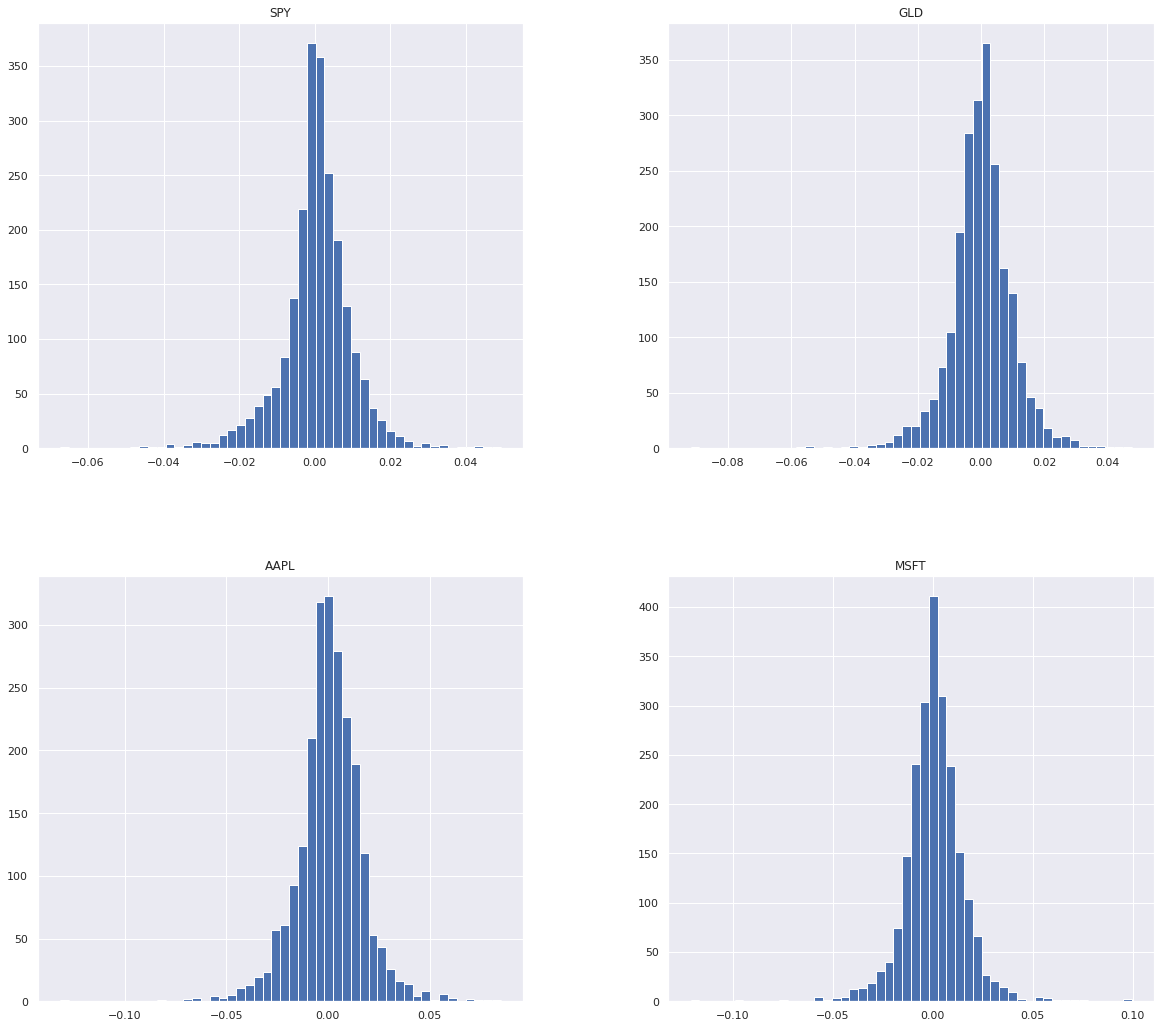

In [19]:
log_returns.hist(bins=50, figsize=(20, 18));

As a next step, consider the different statistics for the time series data sets. The kurto‐
sis values seem to be especially far from normal for all four data sets:

In [20]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      2261.00000
           min        -0.06749
           max         0.04929
          mean         0.00042
           std         0.00942
          skew        -0.49086
      kurtosis         4.53313

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      2261.00000
           min        -0.09191
           max         0.04772
          mean         0.00004
           std         0.01002
          skew        -0.59177
      kurtosis         5.84482

Results for symbol AAPL
------------------------------
     statistic           value
------------------------------
          size      2263.00000
           min        -0.13185
           max         0.08507
          mean         0.00078
           std         0.01618
          skew        -0.25319
      kurtosis         4.498

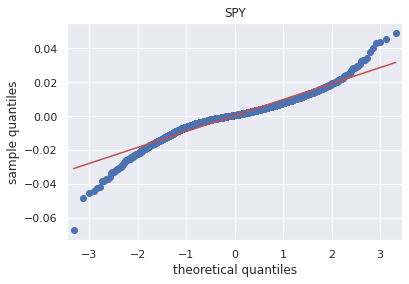

In [21]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

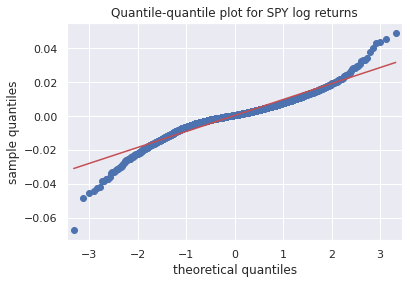

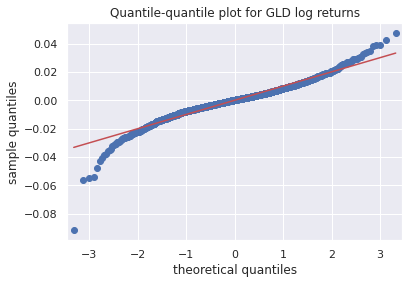

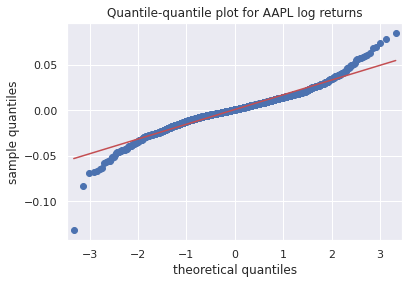

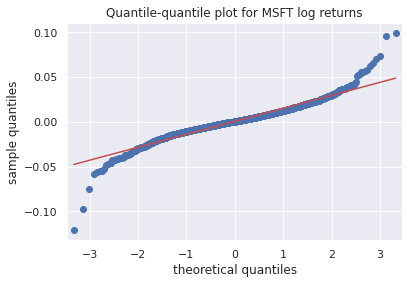

In [22]:
for sym in symbols:
    sm.qqplot(log_returns[sym].dropna(), line='s')
    plt.title(sym)
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles');
    plt.title(f'Quantile-quantile plot for {sym} log returns')

Note that, QQ plot for the securities. Obviously, the sample quantile values do not lie on a straight line, indicating “non-normality.” On the left and right
sides there are many values that lie well below the line and well above the line, respectively. In other words, the time series data exhibits fat tails. This term refers to a (frequency) distribution where large negative and positive values are observed more
often than a normal distribution would imply.

In [23]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(32 * '-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol SPY
--------------------------------
Skew of data set -0.4908644050400558
Skew test p-value 1.2350579672696934e-19
Kurt of data set 4.533130203406613
Kurt test p-value 2.3762727243152256e-53
Norm test p-value 6.52991174790917e-70

Results for symbol GLD
--------------------------------
Skew of data set -0.5917705693759574
Skew test p-value 9.503572524435198e-27
Kurt of data set 5.8448183487957355
Kurt test p-value 2.2000123922811296e-64
Norm test p-value 6.029079202879679e-88

Results for symbol AAPL
--------------------------------
Skew of data set -0.25319488862082223
Skew test p-value 1.1839902576888666e-06
Kurt of data set 4.498521137844293
Kurt test p-value 4.468564619526569e-53
Norm test p-value 6.46245255044883e-57

Results for symbol MSFT
--------------------------------
Skew of data set -0.09330715417423288
Skew test p-value 0.0696530212254029
Kurt of data set 6.733040945993222
Kurt test p-value 6.04571496953546e-71
Norm test p-value 2.6111343076434818e-70


The p-values of the different tests are all zero, strongly rejecting the test hypothesis that
the different sample data sets are normally distributed. This shows that the normal
assumption for stock market returns and other asset classes—as, for example,
embodied in the geometric Brownian motion model—cannot be justified in general
and that one might have to use richer models that are able to generate fat tails (e.g.,
jump diffusion models or models with stochastic volatility).

# Portfolio Optimization

Modern or mean-variance portfolio theory is a major cornerstone of financial theory.
Based on this theoretical breakthrough the Nobel Prize in Economics was awarded to
its inventor, Harry Markowitz, in 1990. Although formulated in the 1950s, it is still a
theory taught to finance students and applied in practice today (often with some
minor or major modifications). This section illustrates the fundamental principles of
the theory.

**By looking only at mean and variance, we are necessarily assuming that no other statis‐
tics are necessary to describe the distribution of end-of-period wealth. Unless investors
have a special type of utility function (quadratic utility function), it is necessary to
assume that returns have a normal distribution, which can be completely described by
mean and variance.**

The analysis and examples that follow use the same financial instruments as before.
The basic idea of MPT is to make use of diversification to achieve a minimal portfolio
risk given a target return level or a maximum portfolio return given a certain level of
risk. One would expect such diversification effects for the right combination of a
larger number of assets and a certain diversity in the assets. However, to convey the
basic ideas and to show typical effects, four financial instruments shall suffice.

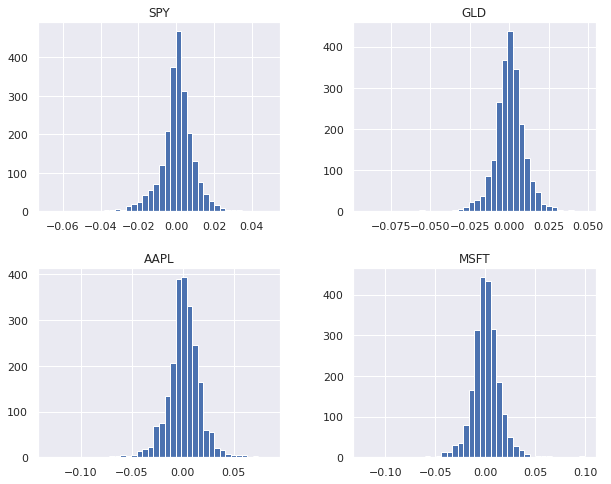

In [24]:
rets = np.log(data / data.shift(1))
rets.hist(bins=40, figsize=(10, 8));

In [25]:
rets.mean() * 252

Symbols
SPY     0.105588
GLD     0.009972
AAPL    0.196555
MSFT    0.154423
dtype: float64

In [26]:
rets.cov() * 252

Symbols,SPY,GLD,AAPL,MSFT
Symbols,,,,
SPY,0.022374,-0.000006,0.022305,0.023570
GLD,-0.000006,0.025298,0.001269,-0.000587
AAPL,0.022305,0.001269,0.066011,0.026217
MSFT,0.023570,-0.000587,0.026217,0.052889


# The Basic Theory
In what follows, it is assumed that an investor is not allowed to set up short positions
in a financial instrument. Only long positions are allowed, which implies that 100%
of the investor’s wealth has to be divided among the available instruments in such a
way that all positions are long (positive) and that the positions add up to 100%. Given
the four instruments, one could, for example, invest equal amounts into every such
instrument—i.e., 25% of the available wealth in each. The following code generates
four uniformly distributed random numbers between 0 and 1 and then normalizes
the values such that the sum of all values equals 1

In [27]:
noa = len(symbols)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.07650728, 0.06021919, 0.63364218, 0.22963135])

In [28]:
# Annualized portfolio return given the portfolio weights.
rets.mean().dot(weights) * 252

0.16868492279492964

In [29]:
data

Symbols,SPY,GLD,AAPL,MSFT
Date,,,,
2010-01-04,90.5872,109.80,6.51522,24.3178
2010-01-05,90.8273,109.70,6.52639,24.3267
2010-01-06,90.8759,111.51,6.42221,24.1758
2010-01-07,91.2784,110.82,6.41085,23.9257
2010-01-08,91.5818,111.37,6.45401,24.0934
...,...,...,...,...
2018-12-24,220.2260,120.02,35.43090,90.1768
2018-12-26,231.3520,119.66,37.92330,96.3359
2018-12-27,233.1370,120.57,37.67610,96.9356
